In [6]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#For Buiilding the Model
#from kneed import KneeLocator
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans



### Loading and Pre-processing data

In [7]:
### Load the data
df = pd.read_csv("song_data.csv", index_col = 0)
print("Size of the data:", df.shape)
df.tail(n=100)

Size of the data: (18835, 14)


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
Shrike,72,300706,0.464,0.387,0.278,0.005270,7,0.102,-8.454,0,0.0318,153.426,3,0.0632
Chemicals,72,199906,0.885,0.608,0.238,0.125000,0,0.111,-13.604,1,0.0434,78.013,4,0.2700
People Change,69,212853,0.884,0.374,0.276,0.012300,7,0.122,-14.945,1,0.0353,80.169,4,0.4120
Thousand (feat. Lisa Hannigan),69,206440,0.943,0.676,0.198,0.013200,1,0.104,-13.910,1,0.0333,118.004,4,0.1250
Old Friend,69,148200,0.811,0.412,0.241,0.392000,3,0.114,-13.477,1,0.0295,100.979,4,0.3740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.111,-16.107,1,0.0348,113.969,4,0.3000
Answers,60,205666,0.765,0.495,0.161,0.000001,11,0.105,-14.078,0,0.0301,94.286,4,0.2650
Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.125,-12.222,1,0.0355,130.534,4,0.2860


I decided to do two things in here. I am not sure whether to include the song popularity as one of the features given that we highlighted it on the proposal or just exclude it when training the dataset and use it later. So, I decided to create two datasets for that and compare. But it is really mostly based on hopw we understand and interpret our problem.

## Dropping song popularity with other "irrelevant features"
### Using this dataset in getting the k-means

In [8]:
#Filter out features
song_feature = df.drop(['song_duration_ms','time_signature', 'key','audio_mode'], axis = 1)
song_feature.head()

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
song_name,,,,,,,,,,
Boulevard of Broken Dreams,73,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.474
In The End,66,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.370
Seven Nation Army,76,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,0.324
By The Way,74,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.198
How You Remind Me,56,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.574


array([[<AxesSubplot:title={'center':'song_popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'audio_valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

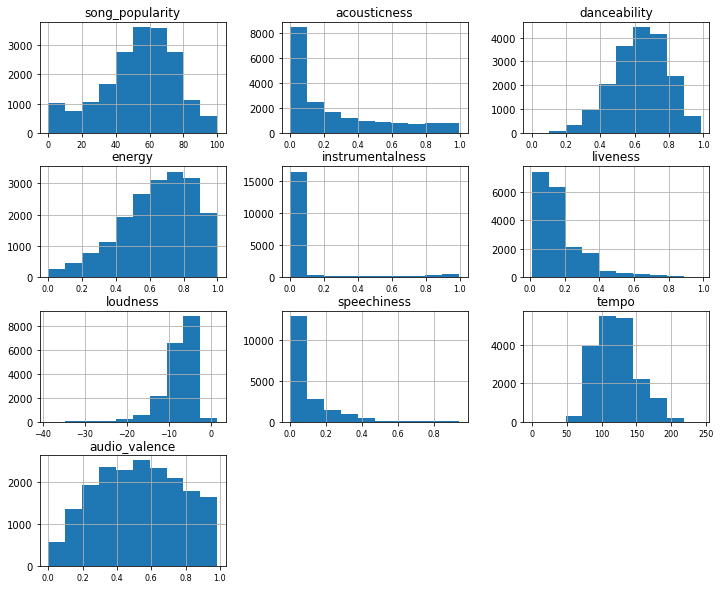

In [9]:
song_feature.hist(xlabelsize=8, figsize=(12,10))

### Descriptive Analysis

In [42]:
#Mean, Median, and Mode

In [43]:
#Standard Deviation

In [44]:
#Frequency

In [45]:
#P value

### Standardized data

In [35]:
y_min = np.min(song_feature, axis=0)
y_max = np.max(song_feature, axis=0) 
y_std = (song_feature - y_min)/(y_max- y_min).values
shape = np.shape(y_std)
y_std

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,cluster
song_name,,,,,,,,,,,
Boulevard of Broken Dreams,0.73,0.005541,0.502533,0.682342,0.000029,0.049226,0.859242,0.031243,0.689425,0.481707,0.8
In The End,0.66,0.010340,0.549139,0.853697,0.000000,0.099580,0.801948,0.052922,0.434371,0.376016,0.0
Seven Nation Army,0.76,0.008202,0.746707,0.462888,0.448345,0.250333,0.766734,0.084166,0.511233,0.329268,1.0
By The Way,0.74,0.026505,0.456940,0.970940,0.003561,0.093426,0.838352,0.113709,0.505303,0.201220,1.0
How You Remind Me,0.56,0.000957,0.452888,0.766517,0.000000,0.104707,0.835204,0.033262,0.709856,0.583333,0.8
...,...,...,...,...,...,...,...,...,...,...,...
Let It Breathe,0.60,0.896586,0.506586,0.150241,0.000066,0.102656,0.561569,0.036982,0.470328,0.304878,0.2
Answers,0.60,0.768072,0.501520,0.160262,0.000001,0.096503,0.611850,0.031987,0.389100,0.269309,0.0
Sudden Love (Acoustic),0.23,0.850401,0.728470,0.324602,0.000000,0.117014,0.657845,0.037726,0.538689,0.290650,0.4


### Using Elbow Method

[Text(0.5, 0, 'Cluster Size'), Text(0, 0.5, 'Inertia')]

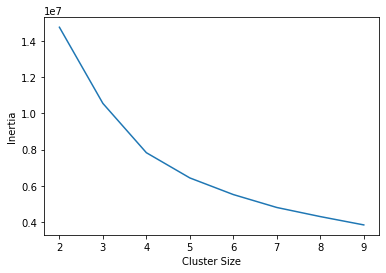

In [38]:
# Determining the cluster size
score = []
for i in range(2,10):
    kmean_model = KMeans(n_clusters=i, random_state=3).fit(song_feature)
    preds = kmean_model.predict(song_feature)
    score.append(kmean_model.inertia_)

# Visualization of different cluster size performations
pd.DataFrame(score, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")


In [39]:
# Training and Predicting
kmeans_model = KMeans(n_clusters=4, random_state=3).fit(song_feature)
preds = kmeans_model.predict(song_feature)

# Adding predictions to dataframe
song_feature['cluster'] = preds

# Grouping clusters to see the averages
cluster = song_feature \
    .groupby('cluster') \
    .agg('mean')
cluster.head()

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
cluster,,,,,,,,,,
0,22.458689,0.267038,0.646123,0.649525,0.099608,0.186865,-7.684784,0.092779,115.615456,0.553470
1,51.024447,0.241128,0.548703,0.675969,0.072920,0.186596,-7.154568,0.131857,168.508112,0.540799
2,64.699517,0.216915,0.661958,0.668458,0.067633,0.178366,-6.936620,0.089755,129.456810,0.516176
3,61.926099,0.303550,0.638626,0.603041,0.077024,0.172815,-7.953463,0.105658,92.494451,0.516939


song_popularity - Cluster 0
acousticness - Cluster 1
danceability - Cluster 0
energy - Cluster 3
instrumentalness - Cluster 2
liveness - Cluster 2
loudness - Cluster 0
speechiness - Cluster - 1
tempo - Cluster 3
audio_valence - Cluster 2

>> The after this I think we can look what songs are included sa cluster with high song popularity and what features yung included sa cluster na to. Pero di talaga ako sure if tama tong ginawa ko based sa pinapagawa ni maam sa atin sa response niya sa email but hopefully it can help even a little.

### Using Silhouette Method

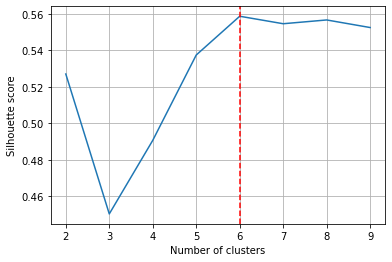

In [40]:
# Generate synthetic data
X, y = make_blobs(n_samples=shape[0], centers=shape[1], random_state=0)

# Create an empty list to store the silhouette scores
scores = []

# Try different values of k
for k in range(2, 10):
    # Cluster the data using K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X)
    
    # Calculate the silhouette score
    score = silhouette_score(X, clusters)
    
    # Append the score to the list
    scores.append(score)

# Find the index of the highest score
max_index = scores.index(max(scores))

# Create a line plot
plt.plot(range(2, 10), scores)

# Add a vertical line at the position of the highest score
plt.axvline(max_index + 2, color='r', linestyle='--')

# Add grid lines
plt.grid()

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()


In [41]:
# Training and Predicting
kmeans = KMeans(n_clusters=6, random_state=0).fit(song_feature)
preds = kmeans.predict(song_feature)

# Adding predictions to dataframe
song_feature['cluster'] = preds

# Grouping clusters to see the averages
clusters = song_feature \
    .groupby('cluster') \
    .agg('mean')
clusters.head()

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
cluster,,,,,,,,,,
0,15.109281,0.218659,0.623720,0.681543,0.124959,0.191884,-7.361848,0.095601,137.250138,0.553573
1,49.509192,0.247922,0.656703,0.658789,0.104583,0.181104,-7.536438,0.082807,125.872368,0.526470
2,67.096174,0.290887,0.643948,0.609802,0.066476,0.169646,-7.725783,0.101897,93.235872,0.518180
3,29.994244,0.339368,0.625442,0.601579,0.093972,0.182089,-8.336600,0.109347,92.966517,0.534054
4,74.524621,0.193789,0.667947,0.673097,0.030798,0.178623,-6.496017,0.096508,131.914391,0.516538


song_feature.head(n=100)

### Creating the algorithm using Logistic Regression

#### Independent Variable/s
Cluster (Not sure if we can include the song features to this one especially those included sa study pero they are already been clustered so...)
#### Dependent Variable
Song Popularity